# Ch4

In [1]:
from collections import defaultdict

import matplotlib.pyplot as plt
import numpy as np

import ch4

%load_ext autoreload
%autoreload 2

In [2]:
def update_L1(L1, L2):
    return 0.5 * (-1 + 0.9 * L1) + 0.5 * (1 + 0.9 * L2)


def update_L2(L1, L2):
    return 0.5 * (0 + 0.9 * L1) + 0.5 * (-1 + 0.9 * L2)

## dp.py

{'L1': 0.0, 'L2': -0.5}
{'L1': -0.22499999999999998, 'L2': -0.725}
{'L1': -0.42749999999999994, 'L2': -0.9274999999999999}
{'L1': -0.6097499999999999, 'L2': -1.10975}
{'L1': -0.7737750000000001, 'L2': -1.273775}
{'L1': -0.9213975000000002, 'L2': -1.4213975}
{'L1': -1.05425775, 'L2': -1.55425775}
{'L1': -1.1738319750000001, 'L2': -1.6738319750000001}
{'L1': -1.2814487775, 'L2': -1.7814487775}
{'L1': -1.3783038997500001, 'L2': -1.8783038997500001}
{'L1': -1.4654735097750002, 'L2': -1.965473509775}
{'L1': -1.5439261587975002, 'L2': -2.0439261587975004}
{'L1': -1.61453354291775, 'L2': -2.11453354291775}
{'L1': -1.6780801886259753, 'L2': -2.1780801886259753}
{'L1': -1.735272169763378, 'L2': -2.2352721697633777}
{'L1': -1.7867449527870403, 'L2': -2.28674495278704}
{'L1': -1.833070457508336, 'L2': -2.3330704575083363}
{'L1': -1.8747634117575025, 'L2': -2.3747634117575025}
{'L1': -1.9122870705817523, 'L2': -2.412287070581752}
{'L1': -1.9460583635235769, 'L2': -2.446058363523577}
{'L1': -1.9764

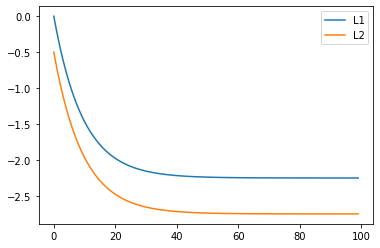

In [3]:
V = {"L1": 0.0, "L2": 0.0}
new_V = V.copy()

V1_log = []
V2_log = []

for _ in range(100):
    new_V["L1"] = update_L1(**V)
    new_V["L2"] = update_L2(**V)

    V = new_V.copy()
    print(V)

    V1_log.append(new_V["L1"])
    V2_log.append(new_V["L2"])

plt.plot(range(len(V1_log)), V1_log, label="L1")
plt.plot(range(len(V2_log)), V2_log, label="L2")
plt.legend()
plt.show()

{'L1': -2.249167525908671, 'L2': -2.749167525908671}
76


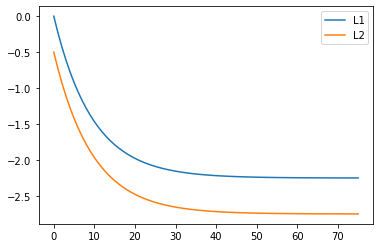

In [4]:
V = {"L1": 0.0, "L2": 0.0}
new_V = V.copy()

V1_log = []
V2_log = []

cnt = 0
while True:
    new_V["L1"] = update_L1(**V)
    new_V["L2"] = update_L2(**V)

    delta = abs(new_V["L1"] - V["L1"])
    delta = max(delta, abs(new_V["L2"] - V["L2"]))
    V = new_V.copy()

    V1_log.append(new_V["L1"])
    V2_log.append(new_V["L2"])

    cnt += 1
    if delta < 0.0001:
        print(V)
        print(cnt)
        break

plt.plot(range(len(V1_log)), V1_log, label="L1")
plt.plot(range(len(V2_log)), V2_log, label="L2")
plt.legend()
plt.show()

## dp_inplace.py

{'L1': -2.2493782177156936, 'L2': -2.7494201578106514}
60


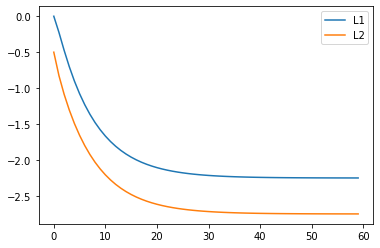

In [5]:
V = {"L1": 0.0, "L2": 0.0}

V1_log = []
V2_log = []

cnt = 0
while True:
    t = update_L1(**V)
    delta = abs(t - V["L1"])
    V["L1"] = t

    t = update_L2(**V)
    delta = max(delta, abs(t - V["L2"]))
    V["L2"] = t

    V1_log.append(V["L1"])
    V2_log.append(V["L2"])

    cnt += 1
    if delta < 0.0001:
        print(V)
        print(cnt)
        break

plt.plot(range(len(V1_log)), V1_log, label="L1")
plt.plot(range(len(V2_log)), V2_log, label="L2")
plt.legend()
plt.show()

## common/gridworld.py

In [6]:
env = ch4.GridWorld()

print(env.height)
print(env.width)
print(env.shape)

3
4
(3, 4)


In [7]:
for action in env.actions():
    print(action)

0
1
2
3


In [8]:
for state in env.states():
    print(state)

(0, 0)
(0, 1)
(0, 2)
(0, 3)
(1, 0)
(1, 1)
(1, 2)
(1, 3)
(2, 0)
(2, 1)
(2, 2)
(2, 3)


In [9]:
any([True, False])

True

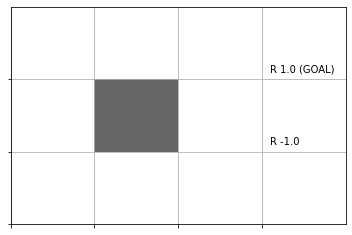

In [10]:
env.render_v()

## gridworld_play.py

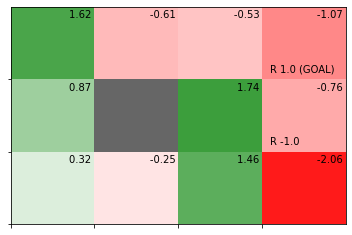

In [11]:
env = ch4.GridWorld()

np.random.seed(1)

# dummy values
V = {state: np.random.randn() for state in env.states()}

env.render_v(V)

## 4.2.2

In [12]:
env = ch4.GridWorld()
V = defaultdict(int)

state = (1, 2)
V[state]

0

In [13]:
pi = defaultdict(lambda: {i:.25 for i in range(4)})

state = (0, 1)
pi[state]

{0: 0.25, 1: 0.25, 2: 0.25, 3: 0.25}

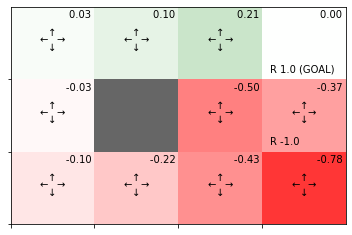

In [14]:
env = ch4.GridWorld()
gamma = .9

pi = defaultdict(lambda: {i:.25 for i in range(4)})

V = defaultdict(int)

V = ch4.policy_eval(pi, V, env, gamma)

env.render_v(V, pi)